In [1]:
import pandas as pd
data = pd.read_csv('.//mit_data2//data2.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642
0,-0.352524,-0.352510,-0.352483,-0.352451,-0.352422,-0.352385,-0.352333,-0.352279,-0.352222,-0.352010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.330612,-0.330879,-0.331027,-0.331051,-0.330956,-0.330753,-0.330393,-0.329846,-0.329126,-0.328220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.409931,-0.409926,-0.409724,-0.409270,-0.408618,-0.407806,-0.406747,-0.405422,-0.403896,-0.402191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.393995,-0.393541,-0.393027,-0.392359,-0.391510,-0.390442,-0.389095,-0.387565,-0.385903,-0.384033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.353095,-0.353120,-0.353119,-0.353096,-0.352905,-0.352442,-0.351708,-0.350631,-0.349267,-0.347657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,0.113863,0.114067,0.115102,0.117002,0.118827,0.121730,0.126096,0.130330,0.133711,0.136364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9955,-0.239889,-0.240519,-0.239609,-0.238906,-0.238384,-0.237736,-0.237360,-0.236640,-0.235237,-0.233756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9956,-0.242022,-0.240294,-0.238558,-0.236916,-0.235440,-0.234298,-0.233224,-0.232066,-0.231049,-0.230180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9957,-0.204272,-0.203779,-0.203448,-0.203280,-0.203270,-0.203441,-0.203770,-0.204245,-0.204585,-0.204561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [2]:
X = data.iloc[:,0:3600]
Y = data.iloc[:,3600:]

In [3]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle=True)

In [4]:
xTrain.shape

(7967, 3600)

In [5]:
yTrain.shape

(7967, 43)

In [6]:
import numpy as np
xTrain = np.array(xTrain)
xTrain = xTrain.reshape(-1, 3600, 1, 1)
print(xTrain.shape)
xTest = np.array(xTest)
xTest = xTest.reshape(-1, 3600, 1, 1)
print(xTest.shape)

(7967, 3600, 1, 1)
(1992, 3600, 1, 1)


In [7]:
import numpy as np
import scipy.io as sio
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import os

def ECGnet():
    def block3(x, K, filter_shape):
        y = BatchNormalization()(x)
        y = Activation("relu")(y)
        y = Conv1D(K, 1, strides=2, padding="same")(y)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        x = Conv1D(K, filter_shape, strides=2, padding="same")(x)
        for i in range(2):
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Conv1D(K, filter_shape, strides=1, padding="same")(x)
        z = GlobalMaxPooling1D()(x)
        z = Dense(4, activation="relu")(z)
        z = Dense(32, activation="sigmoid")(z)
        x = Multiply()([x, z])
        y = Add()([x, y])
        for i in range(3):
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Conv1D(K, filter_shape, strides=1, padding="same")(x)
        z = GlobalMaxPooling1D()(x)
        z = Dense(4, activation="relu")(z)
        z = Dense(32, activation="sigmoid")(z)
        x = Multiply()([x, z])
        return Add()([x, y])
    def block2(x, K, filter_shape):
        y = x
        for i in range(3):
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Conv2D(K, filter_shape, padding="same")(x)
        a = x
        x = GlobalMaxPooling2D()(x)
        x = Dense(8, activation="relu")(x)
        x = Dense(32, activation="sigmoid")(x)
        x = Multiply()([a,x])
        return Add()([x, y])
    def block1(x, K, filter_shape):
        # SE ResNet
        y = Conv2D(K, (1,1), strides=(2,1))(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        x = Conv2D(K,filter_shape,strides=(2,1), padding="same")(x)
        a = x
        x = GlobalMaxPooling2D()(x)
        x = Dense(8, activation="relu")(x)
        x = Dense(32, activation="sigmoid")(x)
        x = Multiply()([a, x])
        return Add()([x,y])

    def scale(x, filter_shape1, filter_shape2):
        for i in range(3):
            x = block2(x, 32, filter_shape1)
        x = Reshape([x.shape[1],x.shape[2]*x.shape[3]])(x)
        print(x)
        for i in range(4):
            x = block3(x, 32, filter_shape2)
        x = GlobalAveragePooling1D()(x)
        return x

    input = Input(shape=(3600,1,1))
    x = Conv2D(32, (50,1), strides=(2,1))(input)
    x = block1(x, 32, (15, 1))
    x = block1(x, 32, (15, 1))
    x = block1(x, 32, (15, 1))
    a = scale(x, (3,1), 3)
    b = scale(x, (5,1), 5)
    c = scale(x, (7,1), 7)
    x = Concatenate()([a,b,c])
    x = Dense(256, activation="sigmoid")(x)
    x = Dense(43, activation="sigmoid")(x)
    return Model(inputs=input, outputs=x)

model = ECGnet()
# tf.keras.utils.plot_model(model, to_file='ECG Model.png', show_shapes=True, show_layer_names=True) 查看模型
model.summary()

Tensor("reshape/Reshape:0", shape=(None, 222, 32), dtype=float32)
Tensor("reshape_1/Reshape:0", shape=(None, 222, 32), dtype=float32)
Tensor("reshape_2/Reshape:0", shape=(None, 222, 32), dtype=float32)
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3600, 1, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1776, 1, 32)  1632        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1776, 1, 32)  128         conv2d[0][0]                     
___________________________________________________________________________________

In [8]:
model.compile(optimizer=tf.optimizers.SGD(lr = 0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_function = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000000001)
history = model.fit(xTrain, yTrain, epochs=20,
                    batch_size=32,
                    validation_split=0.1, 
                    callbacks = [learning_rate_function])

Epoch 1/20
225/225 [==============================] - 131s 583ms/step - loss: 3.4914 - accuracy: 0.0976 - val_loss: 3.6168 - val_accuracy: 0.0188
Epoch 2/20
225/225 [==============================] - 143s 637ms/step - loss: 2.4332 - accuracy: 0.2784 - val_loss: 3.9390 - val_accuracy: 0.0790
Epoch 3/20
225/225 [==============================] - 131s 584ms/step - loss: 1.5594 - accuracy: 0.5293 - val_loss: 2.8656 - val_accuracy: 0.1744
Epoch 4/20
225/225 [==============================] - 146s 649ms/step - loss: 0.7706 - accuracy: 0.8013 - val_loss: 4.5063 - val_accuracy: 0.0841
Epoch 5/20
225/225 [==============================] - 155s 690ms/step - loss: 0.3569 - accuracy: 0.9314 - val_loss: 5.7362 - val_accuracy: 0.0816
Epoch 6/20
225/225 [==============================] - ETA: 0s - loss: 0.2893 - accuracy: 0.9349
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.05000000074505806.
225/225 [==============================] - 159s 708ms/step - loss: 0.2893 - accuracy: 0.9349 - v

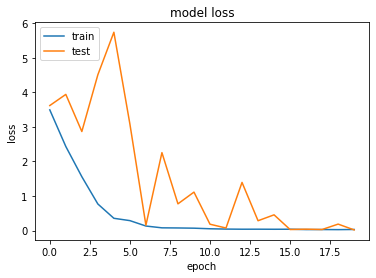

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

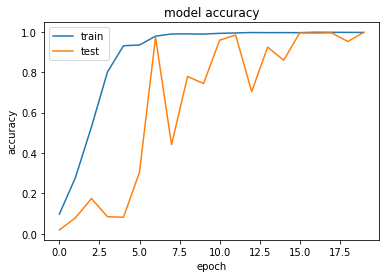

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
scores = model.evaluate(xTest, yTest)
scores[1]

63/63 [==============================] - 10s 152ms/step - loss: 0.0289 - accuracy: 0.9950


0.9949799180030823

In [20]:
prediction = model.predict(xTest)
classes = np.argmax(prediction, axis=1)

In [19]:
np.set_printoptions(threshold=np.inf)
print(classes)

[31 17 12 18  7 30 13 37  8 41 30 33 34  7 35 29 30 39 30 34 20 20 30 25
  7  2 38 29 34  8 42 26 36  7  4 35 42 38 13 35 40  7  9 27  5 33 14 22
 19  5 13 28 21 27  2 19 29  6  8 24 20 34 27 30  2 20 21 37 14 31 27  5
 32 11 26 31 24  7 30 31  4 41 19  8 23 10 26 21 35 41 30 26 35 13 39 27
 20 28 30 11 12  8  0 15 42 10 39 34  8 12 20 19 26 38 36 38  1  1 27 36
 13 29 21 26 27 29 30  1 12  7 26 33 21  9 18 37 21 38 37 10 42 42 35 18
 29 15 35 24 39 15 30 38 25  9 23 27  6 23 20 35  9 13 35  9  8  9 18 37
 36 41 22 14 40 12 28 21 24  1  4 28 37 34 38 25  3 13 19  2 25 34 41 19
 30 26 39 42 11 21 41 26  3  4 17 24  3 36 37 23 26 35 17  1 25 35  3 12
  8 38 32 24 32 40 41 24  0 24 19 37 36 35 29 34 32 25  9 28 42 30 12  2
  2 36 19 17 37 42 36 28 39 14 37 30  1 35 37 22 25  8 29 26 37 21 15 27
 20  9 24 35 19  5 23  2 39 13 26 19 30  3 41  1  5 23 23  6 37  3 35 41
 21 22  2  1 37 21 12  8  0 22  1 29 30 27 23  4 42 32 31  9 23 32 40  5
 34 37 41 25 13 34 34  1 34  5 17 27 16 11 28  8 29